### Importação dos dados



In [107]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [108]:
# Cálculo do faturamento total de cada loja
faturamento1 = loja['Preço'].sum()
faturamento2 = loja2['Preço'].sum()
faturamento3 = loja3['Preço'].sum()
faturamento4 = loja4['Preço'].sum()

# Exibição dos resultados
print(f"Faturamento Loja 1: R$ {faturamento1:.2f}")
print(f"Faturamento Loja 2: R$ {faturamento2:.2f}")
print(f"Faturamento Loja 3: R$ {faturamento3:.2f}")
print(f"Faturamento Loja 4: R$ {faturamento4:.2f}")

# Criação do DataFrame
faturamento = pd.DataFrame({
    "Loja": ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    "Faturamento (R$)": [faturamento1, faturamento2, faturamento3, faturamento4]
})

faturamento

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


,Loja,Faturamento (R$)
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


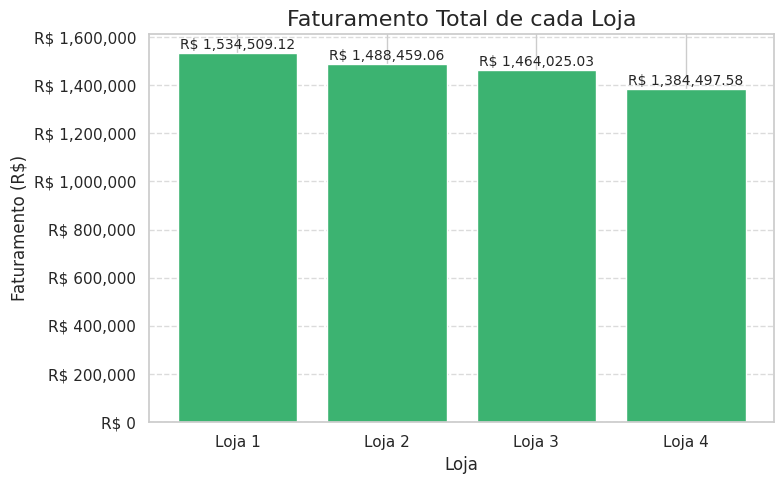

In [109]:
# Criação do gráfico de barras
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(8,5))
plt.bar(faturamento['Loja'], faturamento['Faturamento (R$)'], color='mediumseagreen')

plt.title('Faturamento Total de cada Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)

# Formatação do eixo y para moeda com separador de milhar
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))

# Adição dos valores sobre as barras
for i, v in enumerate(faturamento['Faturamento (R$)']):
    plt.text(i, v + max(faturamento['Faturamento (R$)']) * 0.01, f'R$ {v:,.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [119]:
# Adicionar coluna identificando a loja
loja['Loja']  = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar tudo num único DataFrame
df_all = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Criar tabela pivot com contagem de vendas por loja e categoria
vendas_cat = df_all.groupby(['Loja','Categoria do Produto']).size().unstack(fill_value=0)

# Formatar tabela centralizando valores
tabela_formatada = vendas_cat.style.set_properties(**{'text-align': 'center'}) \
                                   .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Exibir tabela formatada
display(tabela_formatada)

Categoria do Produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
Loja,,,,,,,,
Loja 1,324,312,448,284,182,173,465,171
Loja 2,313,305,422,275,224,197,442,181
Loja 3,315,278,451,277,177,185,499,177
Loja 4,338,254,451,277,170,187,480,201


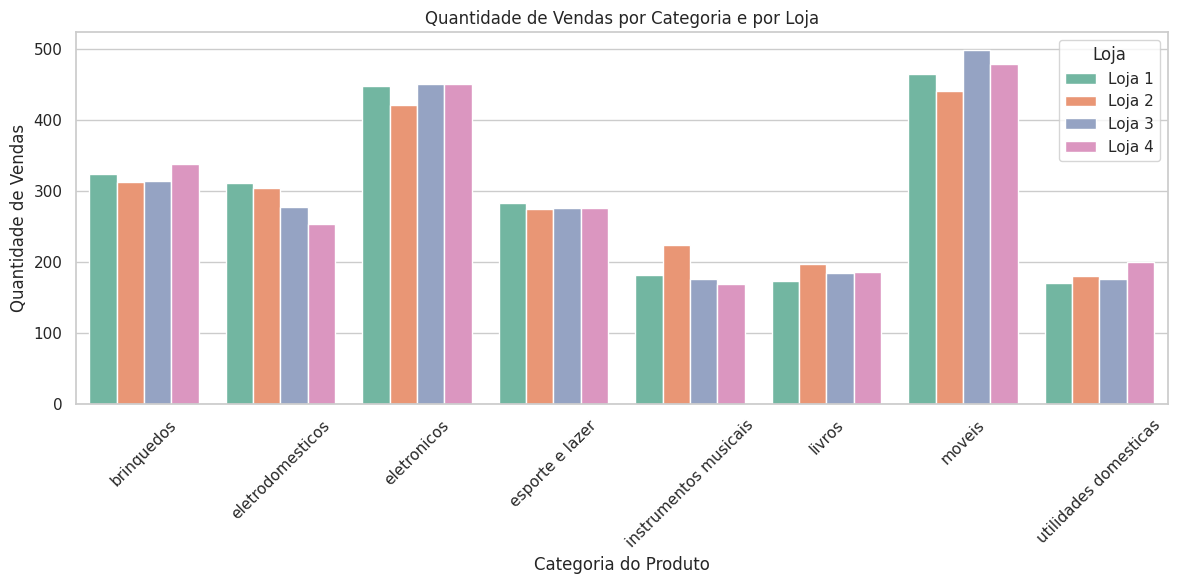

In [120]:
# Plot com Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
g = sns.barplot(
    data=vendas,
    x='Categoria do Produto',
    y='Quantidade',
    hue='Loja',
    palette='Set2'
)

plt.title('Quantidade de Vendas por Categoria e por Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [125]:
media_avaliacao_df = media_avaliacao.reset_index()
media_avaliacao_df.columns = ['Loja', 'Média de Avaliação']

tabela_formatada = (
    media_avaliacao_df.style
    .set_caption("📋 Média de Avaliação das Lojas")
    .format({'Média de Avaliação': '{:.2f}'})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
    .highlight_max(subset=['Média de Avaliação'], color='lightgreen')
    .highlight_min(subset=['Média de Avaliação'], color='yellow')
)

from IPython.display import display
display(tabela_formatada)

,Loja,Média de Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


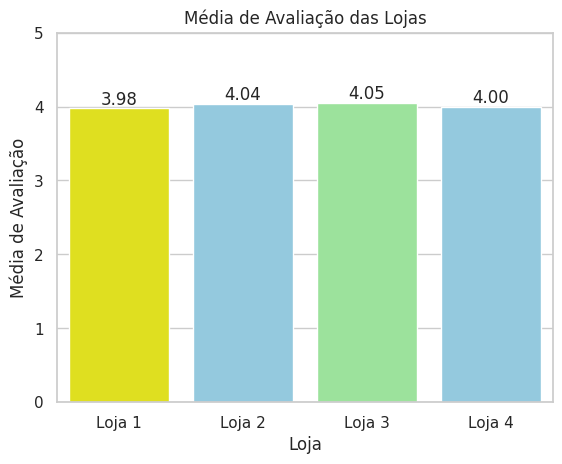

In [186]:
sns.barplot(
    data=media_avaliacao_df,
    x='Loja',
    y='Média de Avaliação',
    hue='Loja',
    palette=[
        'yellow' if v == media_avaliacao_df['Média de Avaliação'].min() else
        'lightgreen' if v == media_avaliacao_df['Média de Avaliação'].max() else
        'skyblue' for v in media_avaliacao_df['Média de Avaliação']
    ],
    legend=False
)

for index, row in media_avaliacao_df.iterrows():
    plt.text(index, row['Média de Avaliação'] + 0.05, f"{row['Média de Avaliação']:.2f}", ha='center')

plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação das Lojas')
plt.ylim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos


===== Produtos mais vendidos - Loja 1 =====
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

Menos vendidos:
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64


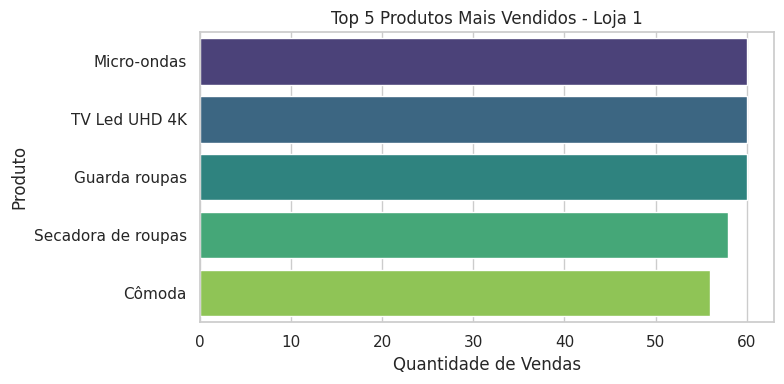


===== Produtos mais vendidos - Loja 2 =====
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Menos vendidos:
Produto
Fone de ouvido       37
Poltrona             35
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64


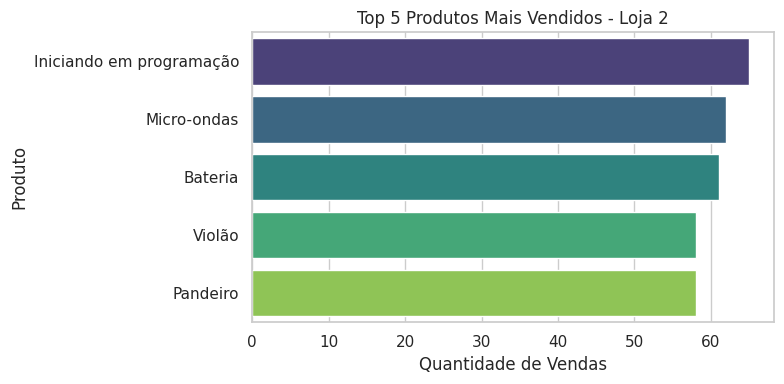


===== Produtos mais vendidos - Loja 3 =====
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

Menos vendidos:
Produto
Guitarra            38
Jogo de copos       36
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64


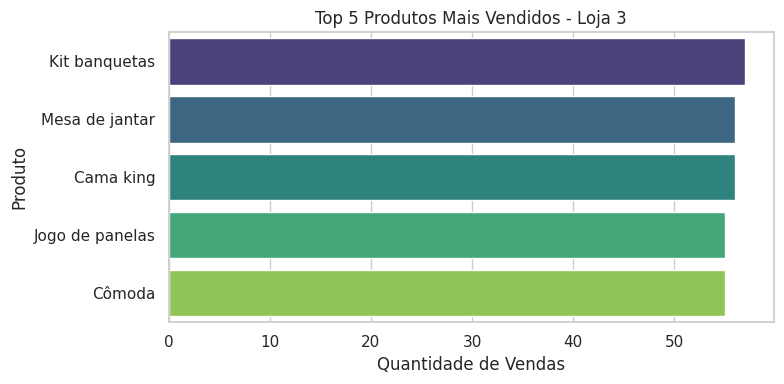


===== Produtos mais vendidos - Loja 4 =====
Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Name: count, dtype: int64

Menos vendidos:
Produto
Geladeira                      38
Ciência de dados com python    38
Violão                         37
Guarda roupas                  34
Guitarra                       33
Name: count, dtype: int64


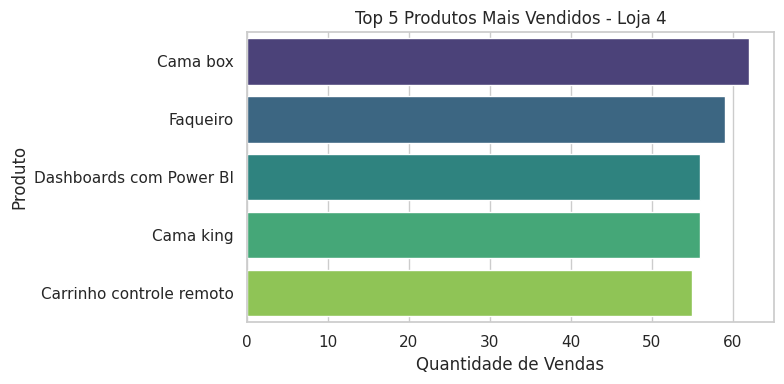

In [187]:
# Definir número de produtos para mostrar
TOP_N = 5

# Loop por cada loja para analisar produtos vendidos
for loja_nome in df_all['Loja'].unique():
    print(f"\n===== Produtos mais vendidos - {loja_nome} =====")

    # Filtra os dados da loja atual
    df_loja = df_all[df_all['Loja'] == loja_nome]

    # Conta quantidade de vendas por produto
    produtos_vendidos = df_loja['Produto'].value_counts()

    # Top 5 mais vendidos
    top_produtos = produtos_vendidos.head(TOP_N)
    print(top_produtos)

    # Bottom 5 menos vendidos
    bottom_produtos = produtos_vendidos.tail(TOP_N)
    print("\nMenos vendidos:")
    print(bottom_produtos)

    # Gráfico dos top 5 mais vendidos
    plt.figure(figsize=(8,4))
    sns.barplot(
    x=top_produtos.values,
    y=top_produtos.index,
    hue=top_produtos.index,
    palette="viridis",
    legend=False
)
    plt.title(f"Top {TOP_N} Produtos Mais Vendidos - {loja_nome}")
    plt.xlabel("Quantidade de Vendas")
    plt.ylabel("Produto")
    plt.tight_layout()
    plt.show()


# 5. Frete Médio por Loja


In [138]:
frete_medio_df = frete_medio.reset_index()
frete_medio_df.columns = ['Loja', 'Frete Médio (R$)']

frete_medio_df.style.set_caption("🚚 Frete Médio por Loja") \
    .format({'Frete Médio (R$)': 'R$ {:.2f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

,Loja,Frete Médio (R$)
0,Loja 1,R$ 34.69
1,Loja 2,R$ 33.62
2,Loja 3,R$ 33.07
3,Loja 4,R$ 31.28


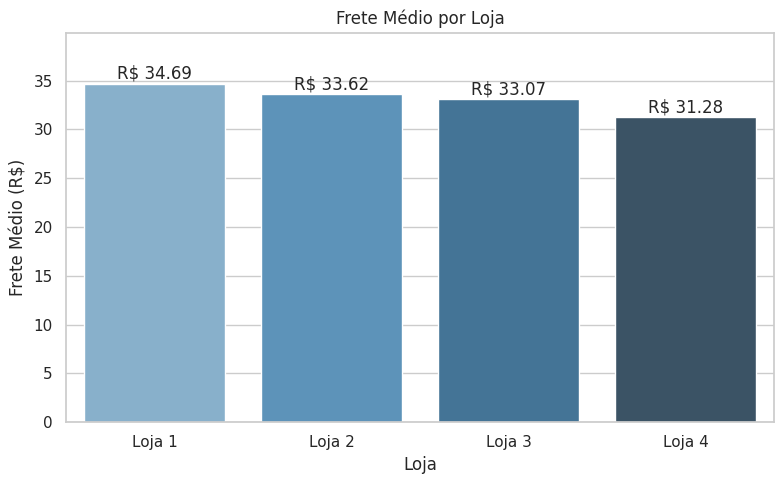

In [188]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=frete_medio_df,
    x='Loja',
    y='Frete Médio (R$)',
    hue='Loja',
    palette='Blues_d',
    legend=False
)

plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.xlabel('Loja')

# Exibir valores acima das barras
for index, row in frete_medio_df.iterrows():
    plt.text(index, row['Frete Médio (R$)'] + 0.5, f"R$ {row['Frete Médio (R$)']:.2f}", ha='center')

plt.ylim(0, frete_medio_df['Frete Médio (R$)'].max() * 1.15)
plt.tight_layout()
plt.show()


#Gráficos

## Desempenho do Faturamento das Lojas

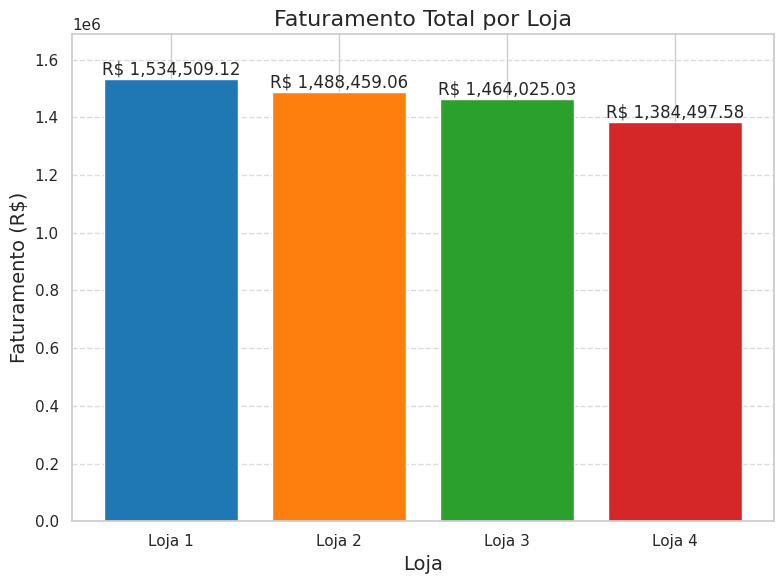

In [141]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento1, faturamento2, faturamento3, faturamento4]  # seus dados aqui

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # azul, laranja, verde, vermelho

plt.figure(figsize=(8,6))
bars = plt.bar(lojas, faturamento, color=cores)

plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)

# Colocar valores em cima das barras
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + max(faturamento)*0.01,
             f'R$ {altura:,.2f}', ha='center', fontsize=12)

plt.ylim(0, max(faturamento)*1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

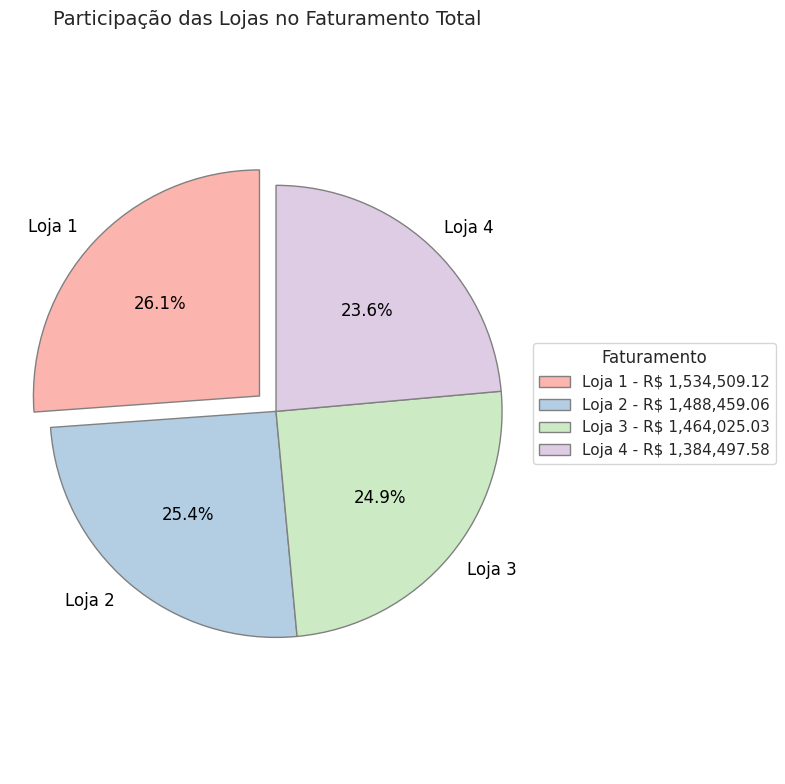

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de faturamento
faturamento_total = [faturamento1, faturamento2, faturamento3, faturamento4]
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = plt.cm.Pastel1.colors

# Romper a maior fatia (loja com maior faturamento)
explode = [0.1 if valor == max(faturamento_total) else 0 for valor in faturamento_total]

# Criação do gráfico
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    faturamento_total,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=cores,
    wedgeprops=dict(edgecolor='gray'),
    textprops=dict(color='black', fontsize=12)
)

# Título
plt.title('Participação das Lojas no Faturamento Total', fontsize=14)

# Legenda detalhada
total = sum(faturamento_total)
legend_labels = [f"{l} - R$ {v:,.2f}" for l, v in zip(labels, faturamento_total)]
plt.legend(wedges, legend_labels, title="Faturamento", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

plt.tight_layout()
plt.axis('equal')
plt.show()

##Distribuição das Vendas por Categoria em Cada Loja

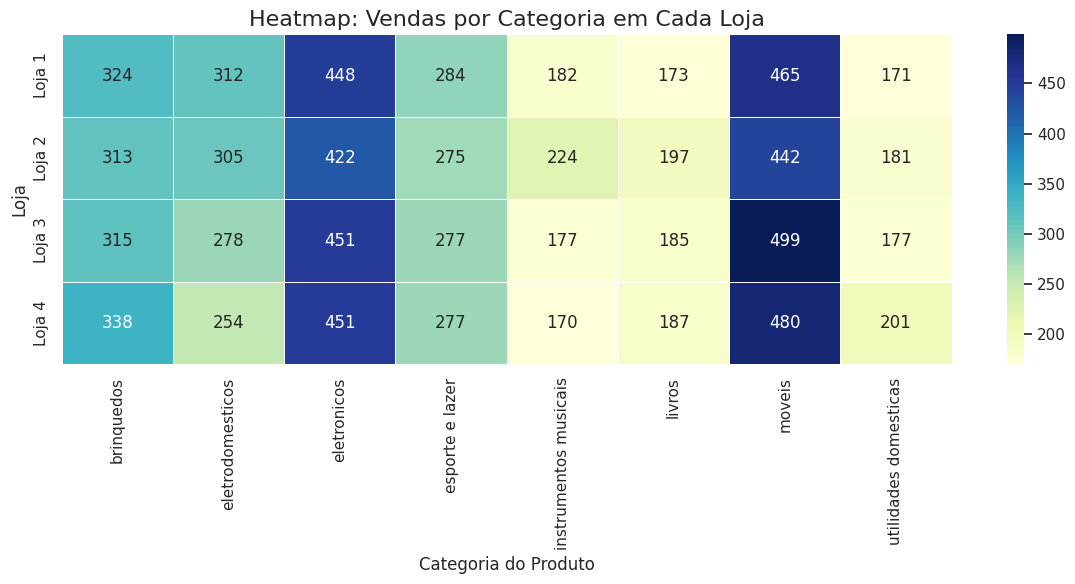

In [181]:
plt.figure(figsize=(12,6))
sns.heatmap(vendas_cat, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)

plt.title('Heatmap: Vendas por Categoria em Cada Loja', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Loja', fontsize=12)

plt.tight_layout()
plt.show()

##Comparativo Geral de Desempenho entre as Lojas

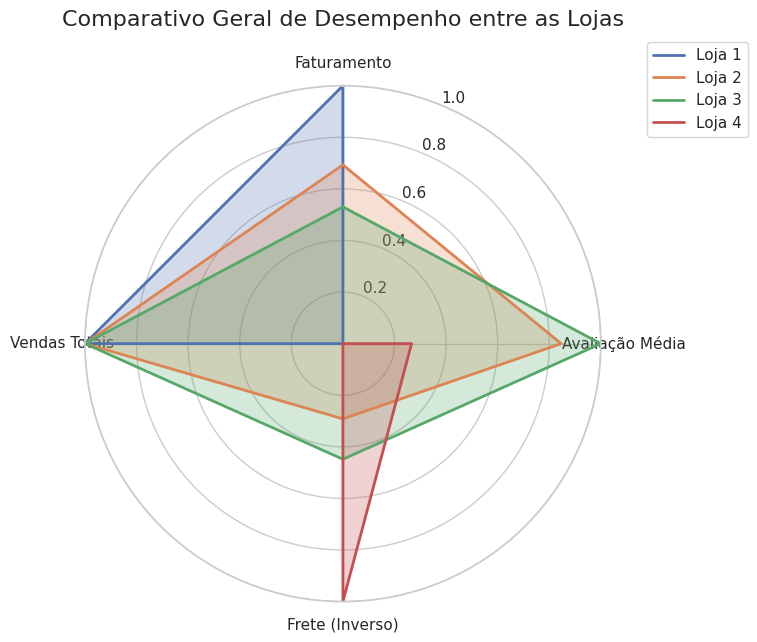

In [183]:
# Criar o DataFrame com os indicadores por loja (substitua pelos seus valores reais)
df_radar = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento1, faturamento2, faturamento3, faturamento4],
    'Avaliação Média': df_all.groupby('Loja')['Avaliação da compra'].mean().values,
    'Frete Médio': df_all.groupby('Loja')['Frete'].mean().values,
    'Vendas Totais': df_all.groupby('Loja').size().values
})

# Inverter o frete para que valor menor signifique melhor desempenho
df_radar['Frete (Inverso)'] = 1 / df_radar['Frete Médio']

# Selecionar as métricas para o radar (excluindo a coluna 'Loja' e 'Frete Médio')
metrics = ['Faturamento', 'Avaliação Média', 'Frete (Inverso)', 'Vendas Totais']

# Normalizar os dados entre 0 e 1
df_norm = df_radar.copy()
for m in metrics:
    min_val = df_radar[m].min()
    max_val = df_radar[m].max()
    df_norm[m] = (df_radar[m] - min_val) / (max_val - min_val)

# Preparar os ângulos do radar
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df_norm.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Fechar o círculo
    ax.plot(angles, values, label=row['Loja'], linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Configurações do gráfico
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

# Ajustar os limites do raio
ax.set_ylim(0, 1)

# Legenda
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.title('Comparativo Geral de Desempenho entre as Lojas', fontsize=16, y=1.1)

plt.tight_layout()
plt.show()

#Relatório Final – Desafio Alura Store

##1. Introdução



O presente relatório tem como objetivo auxiliar o Senhor João na tomada de decisão sobre qual loja da rede Alura Store deve ser vendida para viabilizar um novo empreendimento. Para isso, foram realizadas análises comparativas entre as quatro lojas fictícias com base em dados de vendas, categorias de produtos, avaliações de clientes, produtos mais vendidos e frete médio.

A análise foi conduzida com apoio das bibliotecas Pandas, Matplotlib e Seaborn, com visualizações estratégicas que destacam os principais pontos fortes e fracos de cada loja.



##2. Desenvolvimento

###2.1 Faturamento Total das Lojas

A análise de faturamento revela diferenças significativas no desempenho financeiro entre as quatro unidades. A Loja 1 se destacou como a loja com maior receita total, atingindo aproximadamente R$ 1.534.509,12, o que indica forte volume de vendas ou maior valor médio por transação.

Na sequência, temos a Loja 2 e a Loja 3 — ambas próximas em termos de faturamento, o que sugere um desempenho relativamente equilibrado.

Por outro lado, a Loja 4 apresentou o menor faturamento, totalizando R$ 1.384.497,58, o que pode indicar menor fluxo de clientes, ticket médio reduzido ou menor competitividade local.

É importante destacar que o faturamento isolado não garante maior eficiência, mas serve como um indicador inicial do potencial de vendas de cada unidade. Quando combinado com outros fatores como avaliações, custos logísticos e mix de produtos, o faturamento ajuda a embasar uma decisão mais estratégica.

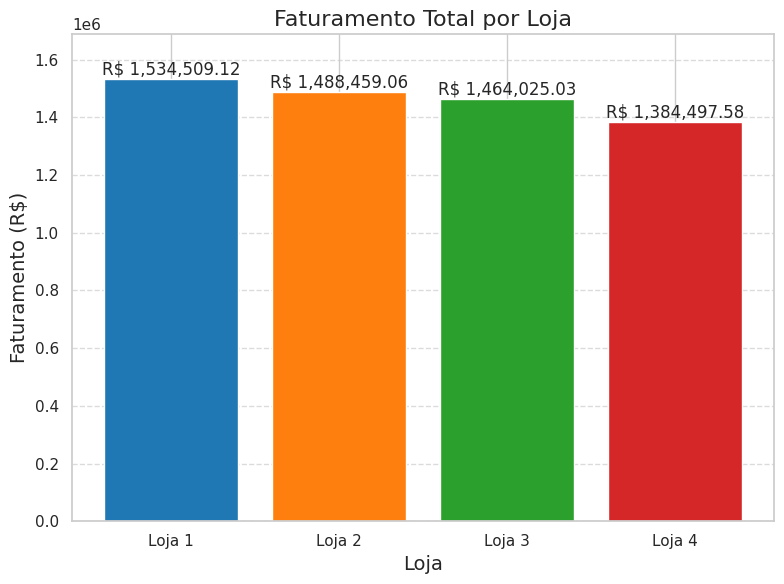

###2.2 Categorias de Produtos Mais Vendidas

A distribuição de vendas por categoria de produto revelou importantes diferenças estratégicas entre as lojas. Através dos gráficos de barras e do heatmap, foi possível visualizar de forma clara quais categorias têm maior ou menor representatividade em cada loja.

A categoria de móveis lidera em todas as lojas, com destaque para a Loja 3, que teve o maior volume (499 vendas). Em seguida, os eletrônicos também aparecem como uma das categorias mais fortes, especialmente na Loja 1 e Loja 4. No entanto, ao analisar o restante das categorias, é possível notar variações significativas:

* A Loja 4 apresenta um perfil mais equilibrado, com vendas distribuídas de forma relativamente homogênea entre diversas categorias.

* A Loja 1, por outro lado, mostra alta concentração em móveis e eletrônicos, com números mais baixos em livros, instrumentos musicais e utilidades domésticas.

* A Loja 2 mantém vendas medianas em quase todas as categorias, o que pode indicar um desempenho mais estável, mas sem destaques relevantes.

* A Loja 3, apesar de forte em móveis, tem baixa participação em diversas categorias, evidenciando um mix de produtos pouco diversificado.

Esses dados reforçam que lojas com mix mais diversificado (como a Loja 4) estão melhor preparadas para enfrentar variações de mercado, enquanto aquelas concentradas em poucos nichos (como Loja 1 e Loja 3) podem estar mais vulneráveis.

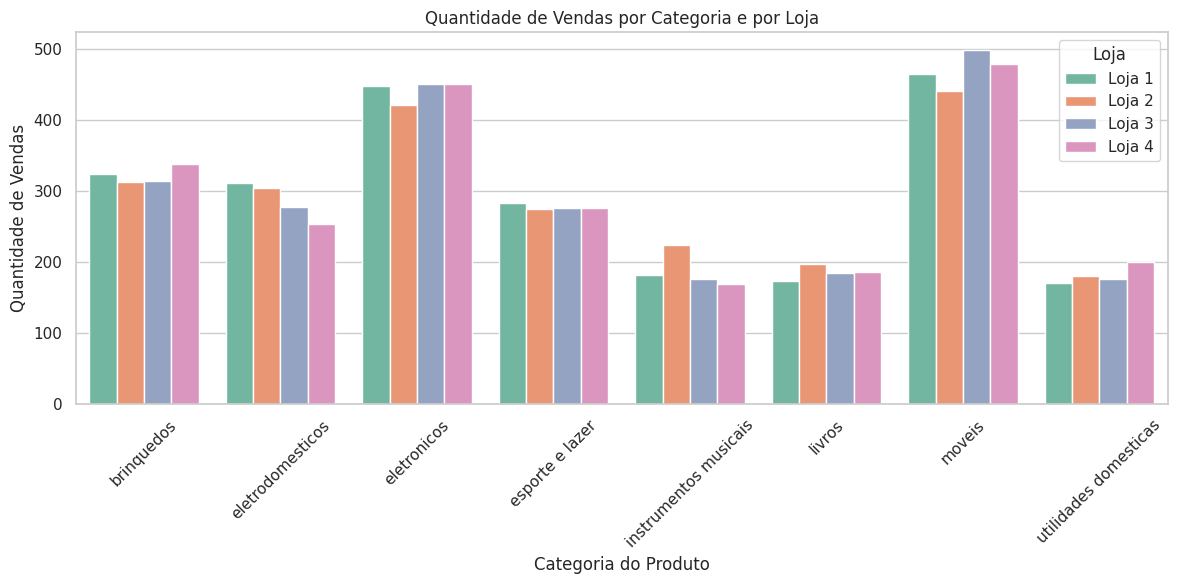

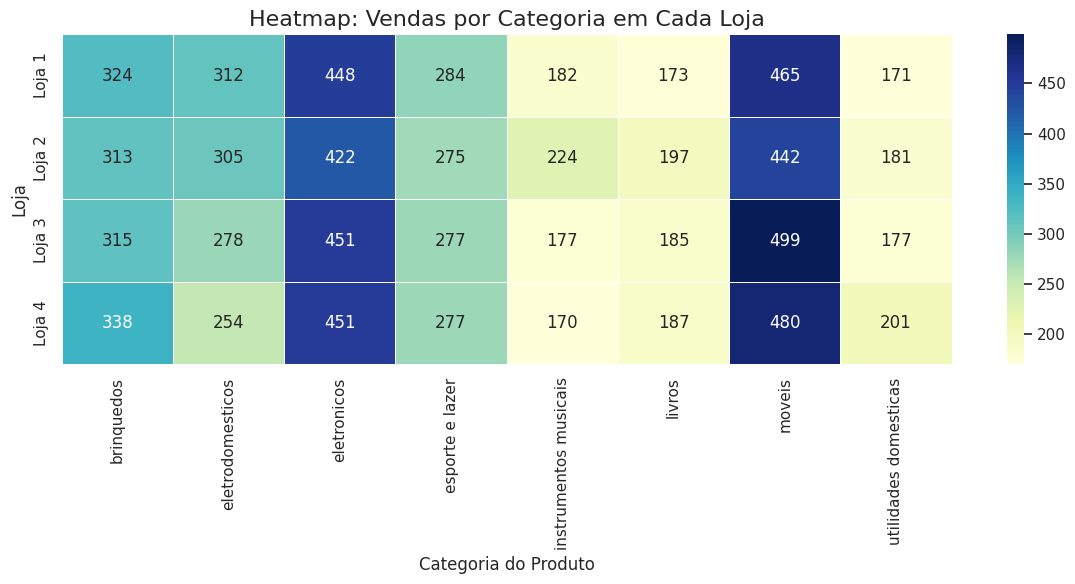

###2.3 Média das Avaliações dos Clientes

A média das avaliações dos clientes fornece uma importante métrica qualitativa sobre a experiência de compra em cada loja. A Loja 3 se destaca positivamente, com a maior média de avaliação: 4.05, sugerindo um atendimento mais eficiente, melhores condições de entrega ou produtos mais alinhados com as expectativas dos consumidores.

Logo em seguida, aparecem a Loja 2 (4.04) e a Loja 4 (4.00), ambas com avaliações satisfatórias. Já a Loja 1 apresentou o pior desempenho, com média de 3.98, sendo a única loja abaixo da marca de 4.0, o que pode indicar problemas pontuais como atrasos, reclamações não resolvidas ou falhas na comunicação com o cliente.

Esses dados são fundamentais para avaliar não apenas o desempenho em vendas, mas a qualidade percebida pelo público, impactando diretamente a fidelização e o potencial de crescimento sustentável da loja.



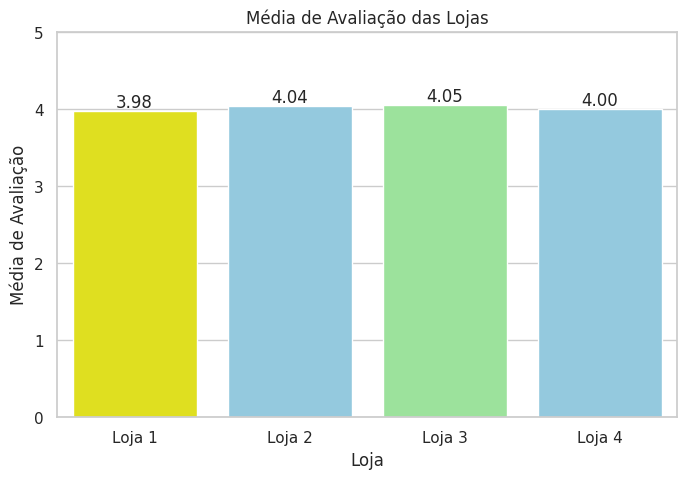

###2.4 Produtos Mais e Menos Vendidos

Em relação ao desempenho de vendas por produto, os gráficos revelam que cada loja possui um perfil distinto de itens mais comercializados:

* Loja 1 apresenta forte presença no segmento de eletrodomésticos e móveis, com destaque para micro-ondas, TV LED UHD 4K, guarda-roupas e cômodas. Essa loja demonstra um mix de produtos de ticket médio relevante, contribuindo para o faturamento elevado.

* Loja 2 possui um mix mais diversificado, com destaque para livros técnicos como "Iniciando em programação" e produtos de instrumentos musicais como bateria, violão e pandeiro, o que pode indicar uma base de clientes mais nichada ou variada.

* Loja 3 concentra suas vendas majoritariamente em móveis e itens domésticos, como kit banquetas, mesa de jantar, cama king e jogo de panelas. Apesar da boa média de avaliação, o portfólio pouco diversificado pode limitar seu crescimento a longo prazo.

* Loja 4 também demonstra variedade, com cama box, faqueiro, cama king, além de produtos tecnológicos como dashboards com Power BI. Ainda assim, seus itens mais vendidos não se destacam em volume ou ticket alto o suficiente para alavancar o faturamento.

Esses dados ajudam a entender não apenas os itens de maior saída, mas também a estrutura e posicionamento de cada loja, sendo essencial para decisões estratégicas como manter, investir ou vender uma unidade.

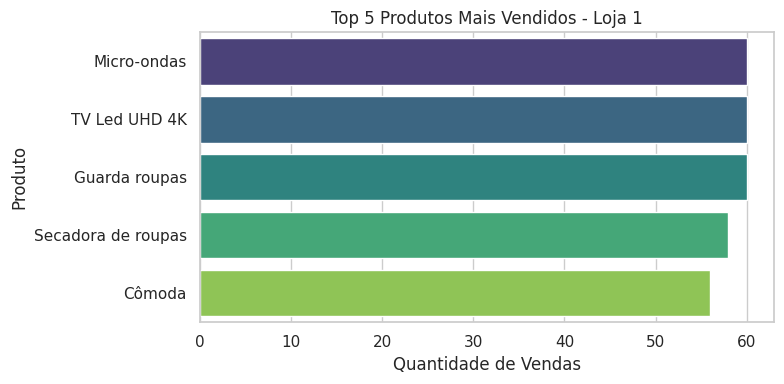

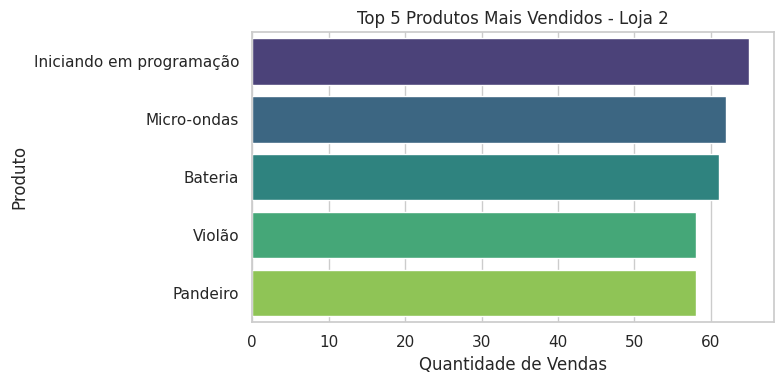

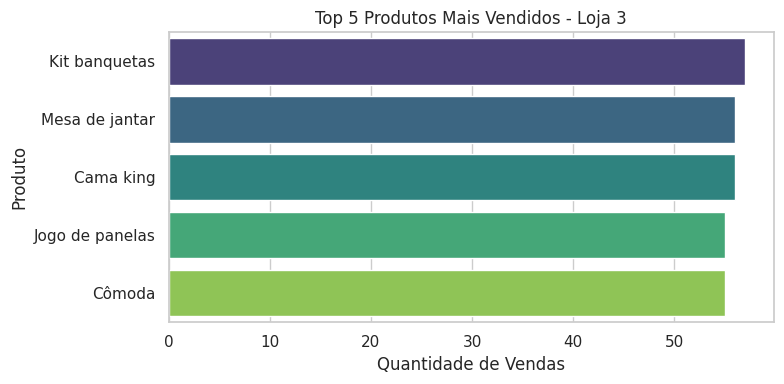

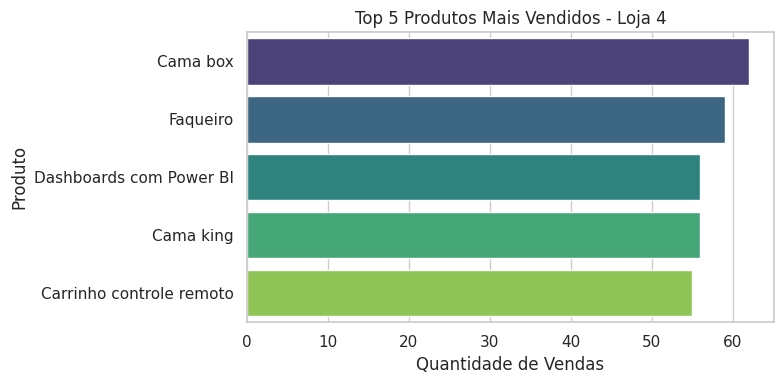

###2.5 Frete Médio por Loja

A Loja 4 se destaca com o menor frete médio, o que pode representar uma vantagem competitiva relevante. Em seguida, aparecem as lojas 3, 2 e 1, sendo esta última a de maior custo médio de frete. Apesar das diferenças não serem expressivas em termos absolutos (variação de R$ 3,41 entre a maior e a menor), elas podem influenciar a decisão de compra de consumidores mais sensíveis ao valor final do pedido.




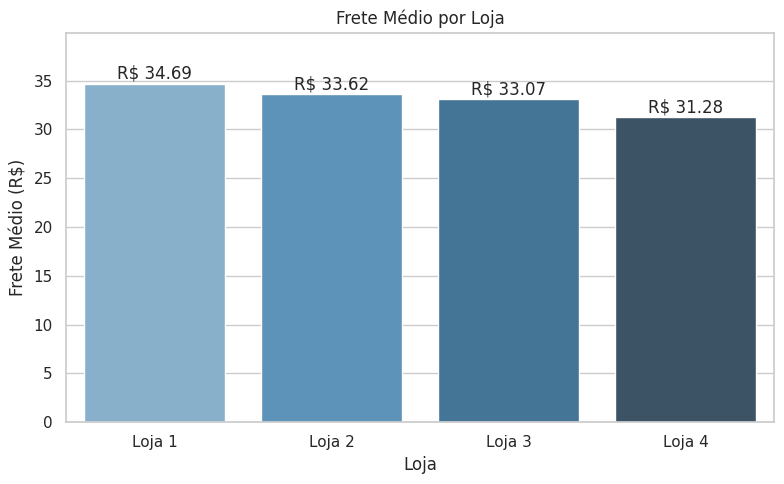

###2.6 Visão Comparativa Geral

O gráfico radar apresentado resume, de forma visual, o desempenho relativo das quatro lojas avaliadas, considerando quatro critérios principais: Faturamento, Avaliação Média dos Clientes, Vendas Totais e Frete (Inverso) — sendo este último invertido para que um valor mais próximo do centro represente um frete mais caro e valores mais distantes representem fretes mais econômicos.

* Loja 1 se destaca com o maior faturamento e o maior volume de vendas totais, o que indica um bom desempenho comercial. No entanto, apresenta baixo índice de avaliação média dos clientes e o frete mais caro, o que pode comprometer a experiência do consumidor.

* Loja 2 apresenta um desempenho equilibrado em todos os critérios: bom faturamento, boas avaliações, vendas totais elevadas e frete relativamente competitivo. Essa consistência pode ser interpretada como um ponto positivo.

* Loja 3 é a mais bem avaliada pelos clientes, o que sugere um bom nível de satisfação com os serviços prestados. Entretanto, seu faturamento e número total de vendas são moderados. O frete também é razoável, mas não se destaca como o mais barato.

* Loja 4 possui o melhor custo de frete, como indicado pela pontuação máxima em "Frete (Inverso)". No entanto, apresenta desempenhos muito baixos nos demais critérios, especialmente em faturamento e vendas, o que limita seu potencial competitivo.

Esse gráfico reforça a necessidade de considerar múltiplas métricas para a decisão final, já que uma loja pode se destacar em um aspecto, mas apresentar fragilidades em outros que comprometem sua atratividade geral.

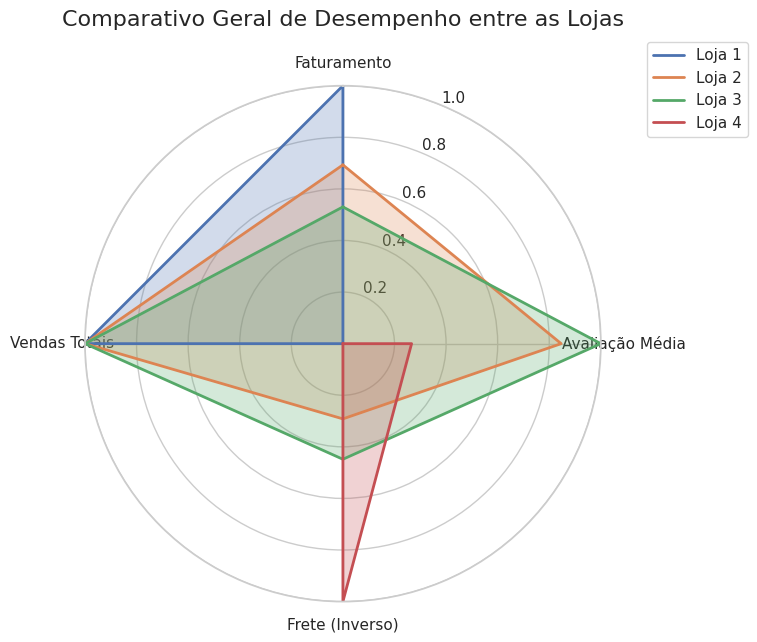

##Considerações finais

Com base em todas as análises apresentadas — faturamento, diversificação, avaliação, frete e perfil de vendas —, a recomendação é que o Senhor João venda a Loja 4.

Apesar de ter o frete mais competitivo, a Loja 4 apresenta o menor faturamento, menor volume total de vendas, produtos com menor ticket médio e desempenho mediano em avaliação. Além disso, não se destaca expressivamente em nenhuma métrica estratégica.

Manter lojas com desempenho mais robusto (como Loja 1 ou Loja 2) e melhor reputação (Loja 3) tende a ser uma decisão mais sustentável no longo prazo.





#Extra: Análise de Desempenho Geográfico

In [180]:
import folium
from folium.plugins import HeatMap

# Filtrar nomes únicos das lojas
lojas = df_all['Loja'].unique()

# Gerar mapas para cada loja
for loja in lojas:
    df_loja = df_all[df_all['Loja'] == loja]

    # Define centro do mapa
    centro = [df_loja['lat'].mean(), df_loja['lon'].mean()]
    mapa = folium.Map(location=centro, zoom_start=5)

    # HeatMap: usando 1 como peso (frequência de vendas)
    heat_data = [[row['lat'], row['lon'], row['Preço']] for idx, row in df_loja.iterrows()]

    HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(mapa)

    # Exibe o mapa (apenas o último vai aparecer em notebooks)
    display(mapa)